In [2]:
import datetime
print(f"the date is {datetime.datetime.now()}")

the date is 2025-06-11 08:33:06.675020


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
# let's encoding data
insurance_encod = pd.get_dummies(insurance, dtype= int)

In [9]:
insurance_encod.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


In [12]:
X = insurance_encod.drop("charges", axis= 1)
y= insurance_encod["charges"]

In [13]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [14]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [27]:
len(X_train), len(X_test)

(1070, 268)

In [29]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.SGD(),
                        metrics= ["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10003.4746 - mae: 10003.4746
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7607.4766 - mae: 7607.4766  
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7606.5547 - mae: 7606.5547
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7603.8457 - mae: 7603.8457 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7893.4756 - mae: 7893.4756   
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8191.6699 - mae: 8191.6699
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7976.4360 - mae: 7976.4360 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7429.6821 - mae: 7429.6821
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8104.1885 - mae: 8104.1885 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8407.1953 - mae: 8407.1953 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8310.9092 - mae: 8310.9092   
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━

In [30]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8756.5312 - mae: 8756.5312  


[8767.0283203125, 8767.0283203125]

In [31]:
y_train.median(), y_train.mean()

(9575.4421, np.float64(13346.089736364485))

## **Improving our model**

In [32]:
# Build improved model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile with better settings
insurance_model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae', 'mse']
)

insurance_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 317403104.0000 - mae: 13379.3018 - mse: 317403104.0000 - val_loss: 309805728.0000 - val_mae: 12635.1445 - val_mse: 309805728.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 322609600.0000 - mae: 13130.3066 - mse: 322609600.0000 - val_loss: 307919072.0000 - val_mae: 12566.6113 - val_mse: 307919072.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 337452576.0000 - mae: 13587.6719 - mse: 337452576.0000 - val_loss: 301937344.0000 - val_mae: 12345.7881 - val_mse: 301937344.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 316724096.0000 - mae: 13108.4297 - mse: 316724096.0000 - val_loss: 286103136.0000 - val_mae: 11741.5869 - val_mse: 286103136.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 286274272.0000 - mae: 12199.6182 - mse: 286274272.0000 - val_loss: 251902048.0000 - val_mae: 10341.9307 - val_mse: 251902048.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - l

In [33]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29551148.0000 - mae: 3773.0176 - mse: 29551148.0000 


[32359872.0, 3858.103759765625, 32359872.0]

In [41]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'), # 100 units
  tf.keras.layers.Dense(10, activation='relu'), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13093.0459 - mae: 13093.0459
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9424.6709 - mae: 9424.6709
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7370.3105 - mae: 7370.3105
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7233.6470 - mae: 7233.6470
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7109.8579 - mae: 7109.8579
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6964.3872 - mae: 6964.3872
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6790.9097 - mae: 6790.9097
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6591.8232 - mae: 6591.8232
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6396.3804 - mae: 6396.3804
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6283.2441 - mae: 6283.2441
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6198.7046 - mae: 6198.7046
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [42]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1828.5114 - mae: 1828.5114  


[1840.018310546875, 1840.018310546875]

Text(0.5, 0, 'epochs')

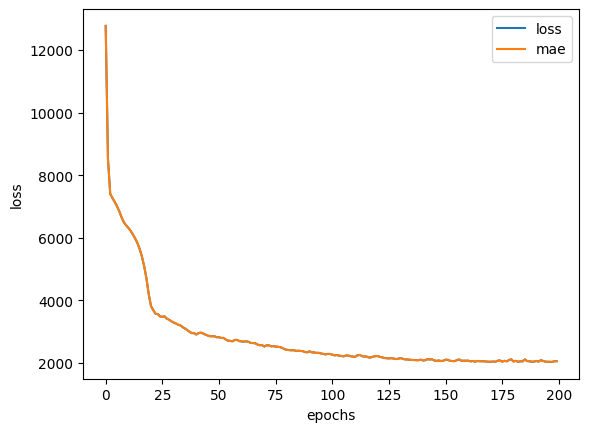

In [43]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## **Preprocessing data (normalization and standardization)**

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [48]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [45]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load the customer dataset
adult_data = fetch_openml(name='adult', version=2, as_frame=True)
df_customer = adult_data.frame

# Select numeric columns for normalization
numeric_cols = df_customer.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns to normalize:", numeric_cols.tolist())

# Initialize and apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_customer[numeric_cols])

# Create normalized dataset
df_customer_normalized = df_customer.copy()
df_customer_normalized[numeric_cols] = scaled_features

df_customer_normalized

Numeric columns to normalize: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,-0.995129,Private,0.351675,11th,-1.197259,Never-married,Machine-op-inspct,Own-child,Black,Male,-0.144804,-0.217127,-0.034087,United-States,<=50K
1,-0.046942,Private,-0.945524,HS-grad,-0.419335,Married-civ-spouse,Farming-fishing,Husband,White,Male,-0.144804,-0.217127,0.772930,United-States,<=50K
2,-0.776316,Local-gov,1.394723,Assoc-acdm,0.747550,Married-civ-spouse,Protective-serv,Husband,White,Male,-0.144804,-0.217127,-0.034087,United-States,>50K
3,0.390683,Private,-0.277844,Some-college,-0.030373,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.886874,-0.217127,-0.034087,United-States,>50K
4,-1.505691,NaN,-0.815954,Some-college,-0.030373,Never-married,NaN,Own-child,White,Female,-0.144804,-0.217127,-0.841104,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,Private,0.640492,Assoc-acdm,0.747550,Married-civ-spouse,Tech-support,Wife,White,Female,-0.144804,-0.217127,-0.195490,United-States,<=50K
48838,0.098933,Private,-0.334178,HS-grad,-0.419335,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.144804,-0.217127,-0.034087,United-States,>50K
48839,1.411808,Private,-0.357510,HS-grad,-0.419335,Widowed,Adm-clerical,Unmarried,White,Female,-0.144804,-0.217127,-0.034087,United-States,<=50K
48840,-1.213941,Private,0.111984,HS-grad,-0.419335,Never-married,Adm-clerical,Own-child,White,Male,-0.144804,-0.217127,-1.648120,United-States,<=50K


In [46]:
df_customer

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
